In [26]:
import numpy as np
import pandas as pd
import seaborn as   sns
import matplotlib.pyplot as plt
from sklearn.cluster  import KMeans
import warnings 
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('C:/Users/Hai Chau/Downloads/zip/mall.csv',sep=';')

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
# univariate analysis

In [19]:
 df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


C:\Users\Hai Chau\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

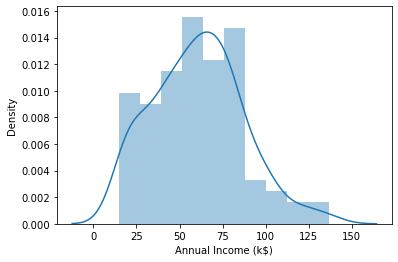

In [25]:
sns.distplot(df['Annual Income (k$)'])

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [36]:
col=[ 'Age', 'Annual Income (k$)','Spending Score (1-100)']

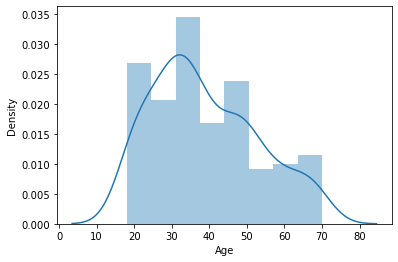

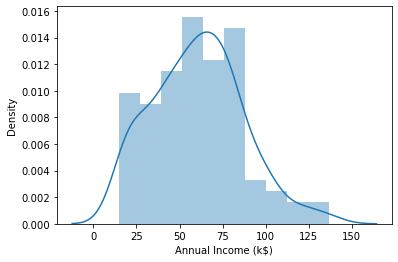

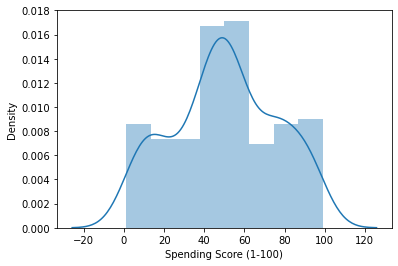

In [37]:
for i in col:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

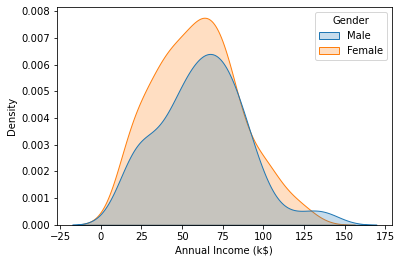

In [42]:
sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender'])

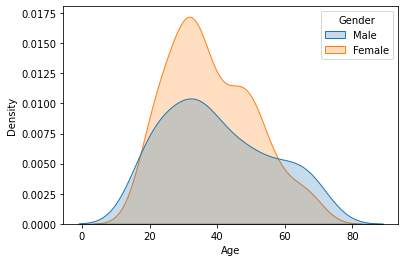

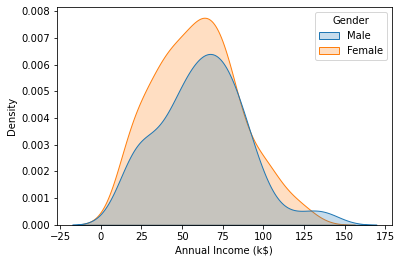

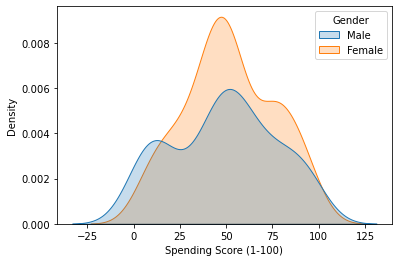

In [43]:
for i in col:
    plt.figure()
    sns.kdeplot(df[i],shade=True,hue=df['Gender'])

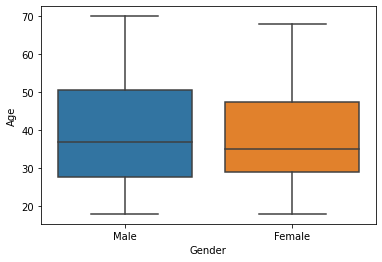

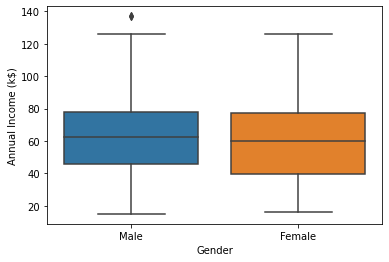

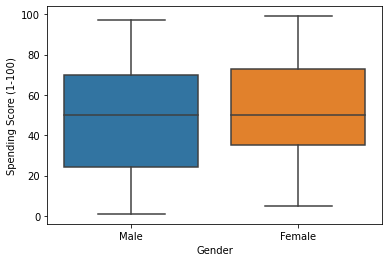

In [44]:
for i in col:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [51]:
df.Gender.value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

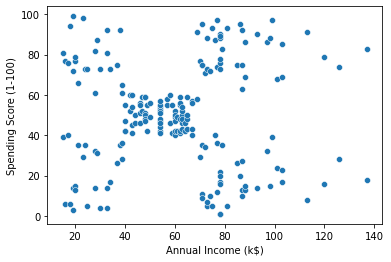

In [52]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')

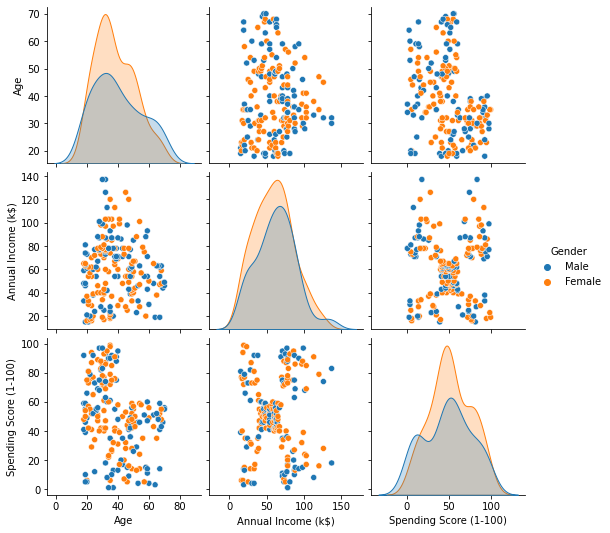

In [65]:

sns.pairplot(df,hue='Gender')

In [60]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [67]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

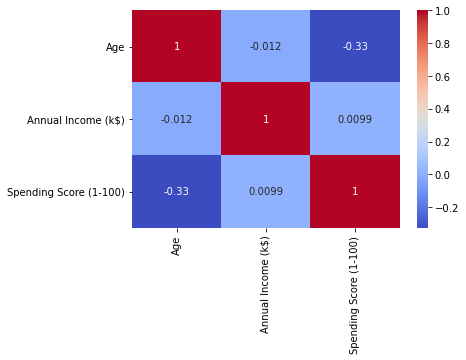

In [70]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [124]:
clustering1=KMeans(n_clusters=3)

In [125]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [126]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [128]:
df['income cluster']=clustering1.labels_

In [129]:
df.groupby('income cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income cluster,,,
0,37.833333,99.888889,50.638889
1,38.930556,33.027778,50.166667
2,39.184783,66.717391,50.054348


In [130]:
df['income cluster'].value_counts()

2    92
1    72
0    36
Name: income cluster, dtype: int64

In [131]:
inertia_score=[]

In [132]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

In [133]:
print(inertia_score)

[137277.2800000002, 48660.88888888887, 23528.152173913048, 13278.112713472474, 8481.49619047619, 5081.484660267269, 3962.5679936006027, 2822.4996947496957, 2217.640620490622, 1734.167748917749]


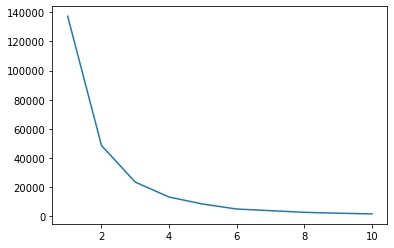

In [134]:
plt.plot(range(1,11),inertia_score)

In [122]:
clustering1=KMeans(n_clusters=3)

In [136]:
# Bivariate clustering

In [141]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

In [153]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and income cluster']=clustering2.labels_

In [155]:
df.head(4)

,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and income cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,3
2,Female,20,16,6,1,0
3,Female,23,16,77,1,3


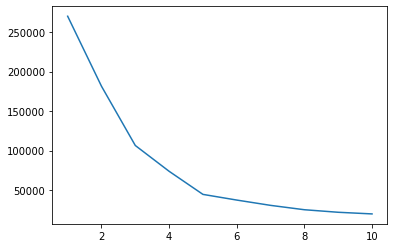

In [151]:
plt.plot(range(1,11),inertia_scores2)

In [160]:
center=pd.DataFrame(clustering2.cluster_centers_)
center.columns=['x','y']


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

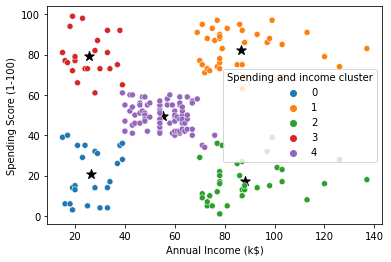

In [164]:
plt.figure()
plt.scatter(x=center['x'],y=center['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and income cluster',palette='tab10')

In [158]:
pd.crosstab(df['Spending and income cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and income cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.592593,0.407407


In [ ]:
# multivate clustering

In [168]:
dff=pd.get_dummies(df,drop_first=True)

In [166]:
dff

,Age,Annual Income (k$),Spending Score (1-100),income cluster,Spending and income cluster,Gender_Female,Gender_Male
0,19,15,39,1,0,0,1
1,21,15,81,1,3,0,1
2,20,16,6,1,0,1,0
3,23,16,77,1,3,1,0
4,31,17,40,1,0,1,0
...,...,...,...,...,...,...,...
195,35,120,79,0,1,1,0
196,45,126,28,0,2,1,0
197,32,126,74,0,1,0,1
198,32,137,18,0,2,0,1


In [171]:
from  sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dff=scale.fit_transform(dff)

In [172]:
dff=pd.DataFrame(scale.fit_transform(dff))

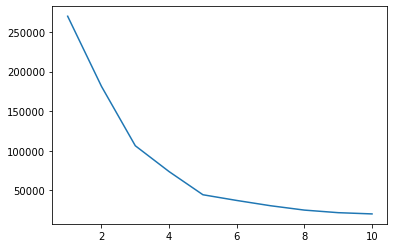

In [173]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores3.append(kmeans3 .inertia_)
plt.plot(range(1,11),inertia_scores3)

In [ ]:
# conclusion: target high income high score
# focus female customer(54%)
# clustering 2 is opportunity